# TP2 -  Practical introduction to Machine Learning Regression

## 1 - Import

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 2 - Data visualization and pre-processing

In [6]:
### Load the data ###

data = np.load("ECoG.npz")

Yall = data["Yall"]
Xall = data["Xall"]
Fe = data["Fe"]

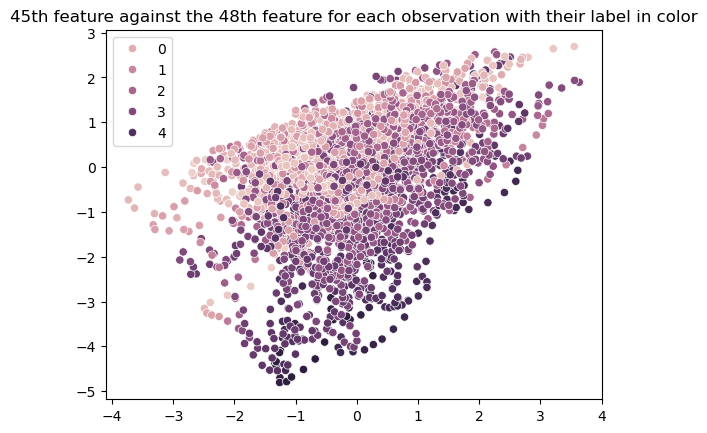

In [26]:
### Plotting the Data ###
sns.scatterplot(x=Xall[:, 45],y=Xall[:, 48], hue=Yall.flatten())
plt.title("45th feature against the 48th feature for each observation with their label in color")
plt.show()

In [25]:
#### Train Test Split ######
n = 1000
X_train, X_test = Xall[:n, :], Xall[n:, :]
y_train, y_test = Yall[:n], Yall[n:]

## 3 - Least Squares regression (LS)

In [39]:
### Adding a column of ones for integrate a constant ###

x_train_matrix = np.concatenate((X_train, np.ones((1000, 1))), axis=1)

In [45]:
####  Solving the least square problem ####

# Using the normal equation: w = (X^T X)^-1 X^T y

# Step 1: Compute X^T
X_T = x_train_matrix.T

# Step 2: Compute X^T * X
X_T_X = np.dot(X_T, x_train_matrix)

# Step 3: Compute X^T * y
X_T_y = np.dot(X_T, y_train)

# Step 4: Solve for weights (w)
w = np.linalg.solve(X_T_X, X_T_y)

# Step 5: The bias term (b) is often the last element of w if you included a bias column
b = w[-1]


# Output the weights and bias
print("Weights (w):", w.flatten()[:-1])
print("Biais :", b)

Weights (w): [-0.09150694  0.10861623 -0.07305774 -0.27938349  0.25112061  0.41213833
  0.14387528 -0.19811799  0.40869961  0.7059866  -0.4557358   0.02140866
  0.35947183 -0.01042572 -0.17655887 -0.03377368 -0.11345198 -0.72143135
 -0.5950915   0.23329595 -0.65132811 -0.33317441  0.28861537  0.24498034
  0.22062027  0.19042788  0.20709995  0.3273775  -0.65410592  0.11997444
 -0.07491945  0.10667581  0.11003235 -0.42910159 -0.22329342 -0.00381723
 -0.06046664 -0.1595164  -0.48519392  0.15019433  0.25855769 -0.09242374
  0.76314124 -0.0834797   0.04489988 -0.16816255  0.04845934  0.0256902
 -1.03905805  0.16060454 -0.19110549  0.16557271  0.08064689  0.27554638
 -0.01162067 -0.00740264  0.33850545  0.22409642 -0.2196636  -0.26866884
 -0.16469195 -0.23638421  0.04244268  0.5694358 ]
Biais : [1.90081255]


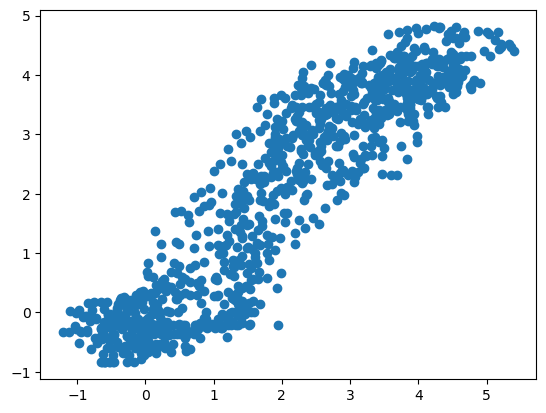

In [60]:
#### Prediction and plotting for the train data####
y_hat_train = np.dot(x_train_matrix, w)

plt.scatter(y_hat_train.flatten(), y_train.flatten())
plt.show()

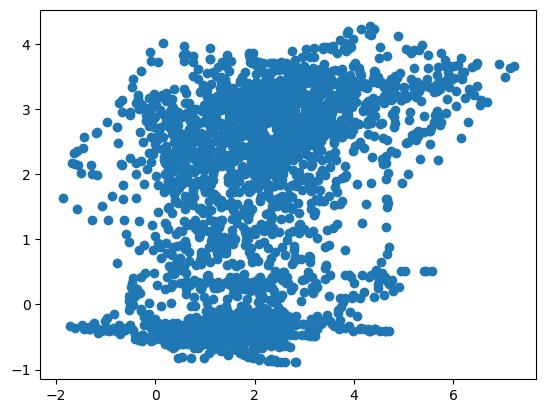

In [61]:
#### Prediction and plotting for the test data####
x_test_matrix = np.concatenate((X_test, np.ones((y_test.shape[0], 1))), axis=1)
y_hat_test = np.dot(x_test_matrix, w)

plt.scatter(y_hat_test.flatten(), y_test.flatten())
plt.show()